In [0]:
import tensorflow as tf
tf.__version__
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True, reshape = False)

In [0]:
print("훈련 이미지 :",  mnist.train.images.shape)
print("훈련 라벨:",  mnist.train.labels.shape)
print("테스트 이미지 : ", mnist.test.images.shape)
print("테스트 라벨 : ", mnist.test.labels.shape)
print("검증 이미지 : ", mnist.validation.images.shape)
print("검증 라벨 : ", mnist.validation.labels.shape)

훈련 이미지 : (55000, 28, 28, 1)
훈련 라벨: (55000, 10)
테스트 이미지 :  (10000, 28, 28, 1)
테스트 라벨 :  (10000, 10)
검증 이미지 :  (5000, 28, 28, 1)
검증 라벨 :  (5000, 10)


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


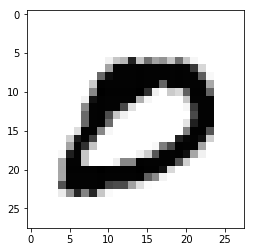

In [0]:
mnist_index = 49999
image = np.reshape(mnist.train.images[mnist_index], [28, 28])
print(mnist.train.labels[mnist_index])
plt.imshow(image, cmap='Greys')
plt.show()

In [0]:
#########
# 옵션 설정
######
learning_rate = 0.001
total_epoch = 30
batch_size = 128

# RNN 은 순서가 있는 자료를 다루므로,
# 한 번에 입력받는 갯수 및 입력 데이터의 차원을 정해야 한다.
# 이를 위해 가로 픽셀수를 n_input(차원) 으로, 세로 픽셀수를 입력 단계인 n_step(입력받는 갯수) 으로 설정하였습니다.
n_input = 28
n_step = 28
n_hidden = 128
n_class = 10


In [0]:
#########
# 신경망 모델 구성
######
X = tf.placeholder(tf.float32, [None, n_step, n_input])
Y = tf.placeholder(tf.float32, [None, n_class])

W = tf.Variable(tf.random_normal([n_hidden, n_class]))
b = tf.Variable(tf.random_normal([n_class]))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# RNN 에 학습에 사용할 셀을 생성합니다
# 다음 함수들을 사용하면 다른 구조의 셀로 간단하게 변경할 수 있습니다
# BasicRNNCell,BasicLSTMCell,GRUCell
cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden)


Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.


In [0]:
cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden)

# RNN 신경망을 생성합니다
# 원래는 다음과 같은 과정을 거쳐야 하지만
# states = tf.zeros(batch_size)
# for i in range(n_step):
#     outputs, states = cell(X[[:, i]], states)
# ...
# 다음처럼 tf.nn.dynamic_rnn 함수를 사용하면
# CNN 의 tf.nn.conv2d 함수처럼 간단하게 RNN 신경망을 만들어줍니다.
# 겁나 매직!!
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API


In [0]:
# 결과를 Y의 다음 형식과 바꿔야 하기 때문에
# Y : [batch_size, n_class]
# outputs 의 형태를 이에 맞춰 변경해야합니다.
# outputs : [batch_size, n_step, n_hidden]
#        -> [n_step, batch_size, n_hidden]
#        -> [batch_size, n_hidden]
outputs = tf.transpose(outputs, [1, 0, 2])
outputs = outputs[-1]
model = tf.matmul(outputs, W) + b

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [0]:
#########
# 신경망 모델 학습
######
sess = tf.Session()
sess.run(tf.global_variables_initializer())

total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(total_epoch):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # X 데이터를 RNN 입력 데이터에 맞게 [batch_size, n_step, n_input] 형태로 변환합니다.
        batch_xs = batch_xs.reshape((batch_size, n_step, n_input))

        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs, Y: batch_ys})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('최적화 완료!')

Epoch: 0001 Avg. cost = 0.576
Epoch: 0002 Avg. cost = 0.230
Epoch: 0003 Avg. cost = 0.180
Epoch: 0004 Avg. cost = 0.154
Epoch: 0005 Avg. cost = 0.137
Epoch: 0006 Avg. cost = 0.131
Epoch: 0007 Avg. cost = 0.114
Epoch: 0008 Avg. cost = 0.113
Epoch: 0009 Avg. cost = 0.107
Epoch: 0010 Avg. cost = 0.101
Epoch: 0011 Avg. cost = 0.098
Epoch: 0012 Avg. cost = 0.085
Epoch: 0013 Avg. cost = 0.091
Epoch: 0014 Avg. cost = 0.088
Epoch: 0015 Avg. cost = 0.086
Epoch: 0016 Avg. cost = 0.085
Epoch: 0017 Avg. cost = 0.083
Epoch: 0018 Avg. cost = 0.081
Epoch: 0019 Avg. cost = 0.081
Epoch: 0020 Avg. cost = 0.075
Epoch: 0021 Avg. cost = 0.069
Epoch: 0022 Avg. cost = 0.067
Epoch: 0023 Avg. cost = 0.068
Epoch: 0024 Avg. cost = 0.070
Epoch: 0025 Avg. cost = 0.068
Epoch: 0026 Avg. cost = 0.067
Epoch: 0027 Avg. cost = 0.067
Epoch: 0028 Avg. cost = 0.063
Epoch: 0029 Avg. cost = 0.062
Epoch: 0030 Avg. cost = 0.060
최적화 완료!


In [0]:
#########
# 결과 확인
######
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

test_batch_size = len(mnist.test.images)
test_xs = mnist.test.images.reshape(test_batch_size, n_step, n_input)
test_ys = mnist.test.labels

print('정확도:', sess.run(accuracy,
                       feed_dict={X: test_xs, Y: test_ys}))

정확도: 0.9766
